In [1]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem.Draw.MolDrawing import MolDrawing, \
DrawingOptions 

RDKit WARNING: [18:00:10] Enabling RDKit 2019.09.1 jupyter extensions


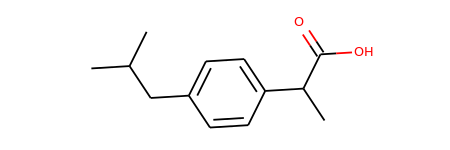

In [2]:
DrawingOptions.bondLineWidth=1.8
ibu = Chem.MolFromSmiles('CC(C)Cc1ccc(cc1)C(C)C(=O)O');ibu

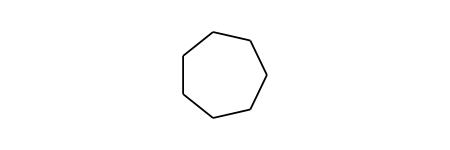

In [3]:
ba=Chem.MolFromSmiles("C1CCCCCC1");ba

In [4]:
ba.GetNumAtoms()

7

In [5]:
print (Chem.MolToMolBlock(ba))


     RDKit          2D

  7  7  0  0  0  0  0  0  0  0999 V2000
    1.7286    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777    1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846    1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5574   -0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3846   -1.6852    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0777   -1.3515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  6  7  1  0
  7  1  1  0
M  END



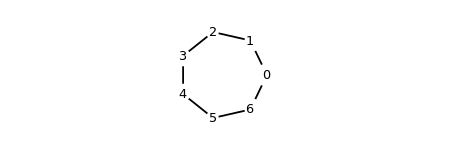

In [6]:
DrawingOptions.includeAtomNumbers=True;ba

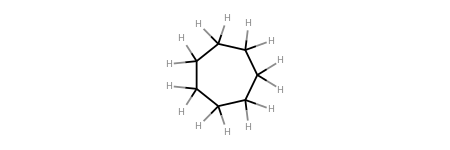

In [7]:
from rdkit.Chem import AllChem
bah= AllChem.AddHs(ba)
DrawingOptions.includeAtomNumbers=False;bah

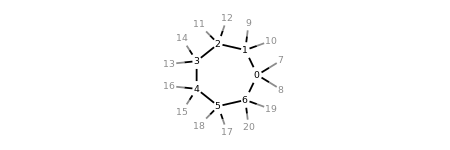

In [8]:
DrawingOptions.includeAtomNumbers=True;bah

In [9]:
import pickle as pickle
pickle.dump(bah,open("bah.pkl","wb"))

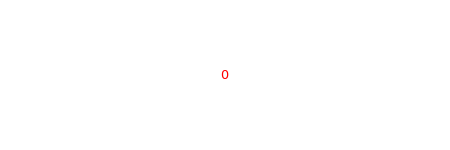

In [10]:
eau=Chem.MolFromSmiles("O");eau

In [11]:
eau.GetNumAtoms()

1

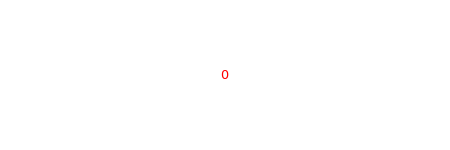

In [12]:
DrawingOptions.includeAtomNumbers=True;eau

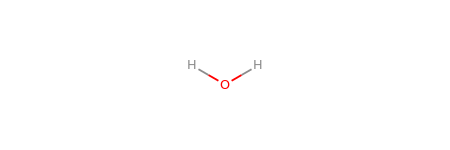

In [13]:
eah=AllChem.AddHs(eau)
DrawingOptions.includeAtomNumbers=False;eah

In [14]:
# InChI=1/H2O/h1H2

In [15]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

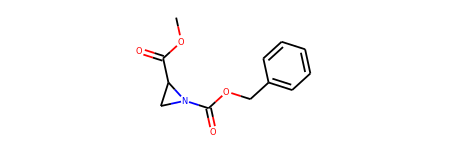

In [16]:
m1 = Chem.MolFromSmiles('COC(=O)C1CN1C(=O)\
OCC2=CC=CC=C2');m1

In [17]:
#Chem.MolToInchi(m1)

In [18]:
import pubchempy as pcp

In [19]:
c = pcp.Compound.from_cid(5090)

In [20]:
print (c.molecular_formula)

C17H14O4S


In [21]:
print (c.isomeric_smiles)

CS(=O)(=O)C1=CC=C(C=C1)C2=C(C(=O)OC2)C3=CC=CC=C3


In [22]:
print (c.iupac_name)

3-(4-methylsulfonylphenyl)-4-phenyl-2H-furan-5-one


In [23]:
print (c.inchi)

InChI=1S/C17H14O4S/c1-22(19,20)14-9-7-12(8-10-14)15-11-21-17(18)16(15)13-5-3-2-4-6-13/h2-10H,11H2,1H3


In [24]:
pcp.get_compounds('COC(=O)C1CN1C(=O)\
OCC2=CC=CC=C2',"smiles")

[Compound(4255958)]

In [25]:
a = pcp.Compound.from_cid(4255958);a

Compound(4255958)

In [26]:
print (a.molecular_formula)

C12H13NO4


In [27]:
print (a.iupac_name)

1-O-benzyl 2-O-methyl aziridine-1,2-dicarboxylate


In [28]:
print (a.inchi)

InChI=1S/C12H13NO4/c1-16-11(14)10-7-13(10)12(15)17-8-9-5-3-2-4-6-9/h2-6,10H,7-8H2,1H3


In [29]:
As=pcp.Compound.from_cid(2244)

In [30]:
print (As.isomeric_smiles)

CC(=O)OC1=CC=CC=C1C(=O)O


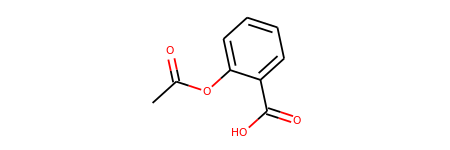

In [31]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
asp = Chem.MolFromSmiles(
"CC(=O)OC1=CC=CC=C1C(=O)O");asp

In [32]:
#pcp.get_synonyms('Aspirin', 'name')
#pcp.get_synonyms('Aspirin', 'name', 'substance')

In [33]:
df1 = pcp.get_compounds('C20H41Br', 'formula', 
                        as_dataframe=True)
df2 = pcp.get_substances([1, 2, 3, 4], 
                         as_dataframe=True)
df3 = pcp.get_properties(['isomeric_smiles','xlogp', 
'rotatable_bond_count'], 'C20H41Br', 'formula',
                         as_dataframe=True)

In [34]:
cs = pcp.get_compounds('C20H41Br', 'formula')
df4 = pcp.compounds_to_frame(cs,properties=[
'isomeric_smiles', 'xlogp', 'rotatable_bond_count'])

In [35]:
#pcp.download('PNG', 'asp.png', 'Aspirin', 'name')
#pcp.download('CSV', 's.csv', [1,2,3], 
#operation='property/CanonicalSMILES,IsomericSMILES')

In [36]:
import py3Dmol
view = py3Dmol.view(query='pdb:1hvr')
view.setStyle({'cartoon':{'color':'spectrum'}});view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [37]:
import py3Dmol

def MolTo3DView(mol, size=(300, 300), style="stick", surface=False, opacity=0.5):
    """Draw molecule in 3D
    
    Args:
    ----
        mol: rdMol, molecule to show
        size: tuple(int, int), canvas size
        style: str, type of drawing molecule
               style can be 'line', 'stick', 'sphere', 'carton'
        surface, bool, display SAS
        opacity, float, opacity of surface, range 0.0-1.0
    Return:
    ----
        viewer: py3Dmol.view, a class for constructing embedded 3Dmol.js views in ipython notebooks.
    """
    assert style in ('line', 'stick', 'sphere', 'carton')
    mblock = Chem.MolToMolBlock(mol)
    viewer = py3Dmol.view(width=size[0], height=size[1])
    viewer.addModel(mblock, 'mol')
    viewer.setStyle({style:{}})
    if surface:
        viewer.addSurface(py3Dmol.SAS, {'opacity': opacity})
    viewer.zoomTo()
    return viewer

In [38]:
from rdkit import Chem
from rdkit.Chem import AllChem

def smi2conf(smiles):
    '''Convert SMILES to rdkit.Mol with 3D coordinates'''
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        mol = Chem.AddHs(mol)
        AllChem.EmbedMolecule(mol)
        AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
        return mol
    else:
        return None

smi = 'COc3nc(OCc2ccc(C#N)c(c1ccc(C(=O)O)cc1)c2P(=O)(O)O)ccc3C[NH2+]CC(I)NC(=O)C(F)(Cl)Br'
conf = smi2conf(smi)
viewer = MolTo3DView(conf, size=(600, 300), style='sphere')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [39]:
viewer = MolTo3DView(conf, size=(600, 300), style='sphere')
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [40]:
from ipywidgets import interact,fixed,IntSlider
import ipywidgets

smis = [ 'COc3nc(OCc2ccc(C#N)c(c1ccc(C(=O)O)cc1)c2P(=O)(O)O)ccc3C[NH2+]CC(I)NC(=O)C(F)(Cl)Br',
    'CC(NCCNCC1=CC=C(OCC2=C(C)C(C3=CC=CC=C3)=CC=C2)N=C1OC)=O',
    'Cc1c(COc2cc(OCc3cccc(c3)C#N)c(CN3C[C@H](O)C[C@H]3C(O)=O)cc2Cl)cccc1-c1ccc2OCCOc2c1',
    'CCCCC(=O)NCCCCC(=O)NCCCCCC(=O)[O-]',
    "CC(NCCNCC1=CC=C(OCC2=C(C)C(C3=CC=CC=C3)=CC=C2)N=C1OC)=O"]
    
confs = [smi2conf(s) for s in smis]

def conf_viewer(idx):
    mol = confs[idx]
    return MolTo3DView(mol).show()

interact(conf_viewer, 
idx=ipywidgets.IntSlider(min=0,max=int(10)-1, step=1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<function __main__.conf_viewer(idx)>

In [41]:
@interact
def smi2viewer(smi='CC=O'):
    try:
        conf = smi2conf(smi)
        return MolTo3DView(conf).show()
    except:
        return None

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [42]:
from ipywidgets import interact,fixed,IntSlider
import ipywidgets

smis = [ 'COc3nc(OCc2ccc(C#N)c(c1ccc(C(=O)O)cc1)c2P(=O)(O)O)ccc3C[NH2+]CC(I)NC(=O)C(F)(Cl)Br',
    'CC(NCCNCC1=CC=C(OCC2=C(C)C(C3=CC=CC=C3)=CC=C2)N=C1OC)=O',
    'Cc1c(COc2cc(OCc3cccc(c3)C#N)c(CN3C[C@H](O)C[C@H]3C(O)=O)cc2Cl)cccc1-c1ccc2OCCOc2c1',
    'CCCCC(=O)NCCCCC(=O)NCCCCCC(=O)[O-]',
    "CC(NCCNCC1=CC=C(OCC2=C(C)C(C3=CC=CC=C3)=CC=C2)N=C1OC)=O"]

confs = [smi2conf(s) for s in smis]

def style_selector(idx, s):
    conf = confs[idx]
    return MolTo3DView(conf, style=s).show()

interact(style_selector, 
         idx=ipywidgets.IntSlider(min=0,max=int(10)-1, step=1),
         s=ipywidgets.Dropdown(
            options=['line', 'stick', 'sphere'],
            value='line',
            description='Style:'))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

<function __main__.style_selector(idx, s)>

In [43]:
@interact
def smi2viewer(smi='CC=O'):
    try:
        conf = smi2conf(smi)
        return MolTo3DView(conf).show()
    except:
        return None

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

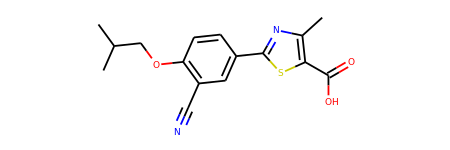

In [44]:
import pprint
import json
import requests
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
smi = 'N#Cc1c(OCC(C)C)ccc(c1)c2nc(c(s2)C(=O)O)C'
Chem.MolFromSmiles(smi)


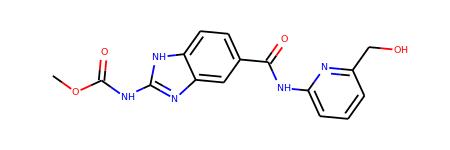

In [45]:
from razi.rdkit_postgresql.functions \
import featmorganbv_fp
smiles = 'COC(=O)Nc1nc2cc(C(=O)Nc3cccc(CO)n3)ccc2[nH]1'
mol = Chem.MolFromSmiles(smiles)
fp = featmorganbv_fp(smiles)
mol

In [46]:
import py3Dmol
view = py3Dmol.view(query='pdb:1adn')
view.setStyle({'stick':{'color':'spectrum'}});view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [47]:
import py3Dmol
import pubchempy as pcp

bromomethane=pcp.get_compounds('bromomethane','name')[0]
x=py3Dmol.view(query='cid:{}'.format(bromomethane.cid), 
width=300,height=300).setStyle({'stick': {'radius': .1},
'sphere': {'scale': 0.25}});x

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [57]:
sticky={'stick': {'radius': 0.1}, 'sphere': {'scale': 0.25}}
#blobby={'stick': {'radius': 1}, 'sphere': {'scale': 1}}

cbr=pcp.get_compounds('CBr', 'smiles')[0]

view = py3Dmol.view(query='cid:{}'.format(cbr.cid),
                    linked=False, viewergrid=(3,7))
view.setStyle(sticky,viewer=(0,0))
#view.setStyle(blobby,viewer=(1,0))

def _addModelView(compound, i, j):
    _compound=pcp.get_compounds(compound, 'smiles')[0]
    view.removeAllModels(viewer=(j,i))
    view.addModel(pcp.get_sdf(_compound.cid),'sdf',viewer=(j,i))
    sty = sticky if j % 2 == 0   else sticky
    view.setStyle(sty,viewer=(j,i))

def _addModel(compound, i):
    _addModelView(compound, i, 0)
    #_addModelView(compound, i, 1)

for i,compound in enumerate(
    ['C1=NC2=NC=NC(=C2N1)N Br','CC1=CNC(=O)NC1=O Br',
     'C1=NC2=C(N1)C(=O)NC(=N2)N Br','C1=C(NC(=O)N=C1)N Br'],
    start=1):
    _addModel(compound, i)

view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [58]:
def molview(mol, w=300, h=300, style={'stick': {'radius': .1}, 'sphere': {'scale': 0.25}}):
    """ Look up molecule by name, get its cid, and render it.
    Changes applied to style will persist in future calls. """
    _mol = pcp.get_compounds(mol, 'name')[0]
    return py3Dmol.view(query='cid:{}'.format(_mol.cid), width=w,height=h).setStyle(style)
molview("methane")

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [59]:
adenine=pcp.get_compounds('adenine','name')[0]
x=py3Dmol.view(query='cid:{}'.format(adenine.cid), 
width=300,height=300).setStyle({'stick': {'radius': .1},
'sphere': {'scale': 0.25}});x

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [60]:
thymine=pcp.get_compounds('thymine','name')[0]
x=py3Dmol.view(query='cid:{}'.format(thymine.cid), 
width=300,height=300).setStyle({'stick': {'radius': .1},
'sphere': {'scale': 0.25}});x

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [61]:
guanine=pcp.get_compounds('guanine','name')[0]
x=py3Dmol.view(query='cid:{}'.format(guanine.cid), 
width=300,height=300).setStyle({'stick': {'radius': .1},
'sphere': {'scale': 0.25}});x

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [62]:
cytosine=pcp.get_compounds('cytosine','name')[0]
x=py3Dmol.view(query='cid:{}'.format(cytosine.cid), 
width=300,height=300).setStyle({'stick': {'radius': .1},
'sphere': {'scale': 0.25}});x

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [64]:
import pubchempy as pcp
pcp.download('SDF', '5090.sdf', 5090, 'cid' ,
             overwrite=True)